# logistic回归模型
- **logistic回归的目的是寻找一个非线性函数sigmoid函数的最佳拟合参数w，** sigmoid(wx)=1/(1+exp(-wx))，找到最佳拟合参数w，使不同类别样本点的特征x输入后，被分到对应的分类中，sigmoid值可以认为是一个概率值，从0~1，当>0.5，分到1类，<=0.5分到0类
- 求解过程可以由最优化算法完成，最常用的最优化算法是梯度下降/上升算法，又可以简化为随机梯度下降/上升算法
- 随机梯度上升算法相比梯度上升算法，每次只使用一个样本点更新参数w，占用更少的计算资源，且可以在新数据到来时就完成参数更新，是一种在线算法
    - 批量梯度下降算法(BGD,Batch Gradient Descent)
    - 随机梯度下降算法(SGD,Stochastic Gradient Descent)
    - 小批量梯度下降算法(MBGD,Mini-Batch Gradient Descent)

### 目录
1. 训练逻辑斯蒂回归模型
2. 绘制决策边界
3. 改进算法
    - 3.1 随机梯度上升法
    - 3.2 改进的随机梯度上升法
    - 3.3 绘制 “迭代次数-回归系数” 的波形图方便理解迭代过程
4. 练习：病马数据集

***
***

## 1. 训练逻辑斯蒂回归模型
### 梯度上升法
- 一文搞懂梯度下降/上升算法：https://www.cnblogs.com/pinard/p/5970503.html
- 梯度上升法计算逻辑斯蒂回归模型的参数
    - 用所有样本点来更新回归系数w
- 梯度上升法属于"批处理"，即，一次处理所有数据，这种方法在处理大数据量是计算复杂度较高
***
- 第三节给出改进算法：**随机**梯度上升法
    - 一次仅用一个样本点来更新回归系数w
    - 此方法可以在新样本到来时进行增量式的更新，因此随机梯度上升法是一种**在线学习算法**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format="retina"

#设置出图显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [20]:
#数据读取函数
def loadDataSet():
    dataMat=[]
    labelMat=[]
    fr=open(r"D:\DM\python\data\logisticRegression_testSet.txt","r")
    for line in fr.readlines():
        lineArr=line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])]) #dataMat为样本特征集合，每个样本特征为[X0,X1,X2]
        labelMat.append(lineArr[2]) #第三列为每个样本的分类标签
    return dataMat,labelMat


#sigmoid函数(类阶跃函数，只是0>1斜率较缓，不是瞬变的)
def sigmoid(z):
    return 1.0/(1+np.exp(-z)) # z=w*x


"""
梯度上升优化算法
思路：
1. 初始化回归系数，即置回归系数w=(w1,w2,...,wn)为全1
2. 将训练集各样本值带入F(X)=sigmoid(w*x)函数计算F(X)值，认为是样本的分类值(二分类01)
3. 计算各训练样本的分类误差error(样本的真实分类值-样本的F(X))
4. 认为本次迭代的梯度=dataMat'*error，得到一个(n,1)的矩阵，用于将回归系数向误差方向调整
5. 将回归系数w向误差方向调整：w(k+1)=w(k)+a*dataMat'*error
6. 重复2~5步，直到迭代达到指定次数或error小于某值，停止迭代，得到回归系数w，逻辑斯蒂回归模型训练完毕
"""
def gradAscent(dataMat,labelMat,numIter=150):
    dataMatrix=np.mat(dataMat) #样本特征矩阵 (m,n)
    labelMatrix=np.mat(labelMat).transpose() #样本类别矩阵 (1,m)
    m,n=np.shape(dataMatrix) #m个样本，n个特征
    
    alpha=0.001 #梯度上升的步长
    weights=np.ones((n,1)) #初始化回归系数
    
    #开始迭代，梯度上升
    for i in range(numIter):
        #将各样本值带入F(X)=sigmoid(w*x)函数计算F(X)，认为是样本在当前迭代的分类值
        Fx=sigmoid(dataMatrix*weights) #shape=(1,m)
        
        #计算各训练样本的分类误差error(样本的真实分类值-样本的F(X))
        #需要将label矩阵浮点数化，与Fx元素数值类型一致，否则报错
        """这里可以加一个if判断，用于在error小于设定值时停止迭代"""
        error=(labelMatrix.astype(float)-Fx) #shape=(1,m) 
        
        #本次迭代的梯度=dataMat'*error,意思为m个样本的n个特征 分别与 m个样本的误差相乘
        """样本误差越大，下一次迭代调整就越多"""
        grad=dataMatrix.transpose()*error #shape=(n,1),用于将回归系数向误差方向调整
        
        #将回归系数w向误差方向调整：w(k+1)=w(k)+a*dataMat'*error
        weights=weights+alpha*grad
  
    #直到迭代达到指定次数或error小于某值，停止迭代，得到回归系数w，逻辑斯蒂回归模型训练完毕
    return weights

In [4]:
dataMat,labelMat=loadDataSet()
dataMatrix=np.mat(dataMat)
labelMatrix=np.mat(labelMat).transpose()
weights=np.ones((3,1))
Fx=sigmoid(dataMatrix*weights)
#labelMatrix-Fx
#labelMatrix.astype(float)-Fx
np.array(dataMat).shape[1]

3

In [5]:
gradAscent(dataMat,labelMat,1000)

matrix([[ 5.43822336],
        [ 0.58605575],
        [-0.78334895]])

**小结**
- 至此得到逻辑斯蒂回归模型参数w，模型表达如下：
- F(X)=1.0/(1+exp(4.12+0.48x1-0.62x2))
- 其中wx=4.12+0.48x1-0.62x2,是一条不同类别数据间的分隔线(决策边界)
     - 下面我们将画出这条决策边界

## 2. 绘制决策边界
- 绘制由模型得到的决策边界

In [21]:
"""
绘制样本数据以及决策边界
思路：
1. 将样本数据根据样本类别标签labelMat分别放入不同的坐标集中
2. 根据坐标集合，分别绘制两个类别样本的散点图
3. 决策边界即x2=f(x1),将wx=4.12+0.48x1-0.62x2=0得到
   wx置零是因为这里正好对应逻辑斯蒂分布的分界线
"""
def plotBestFit(weights):
    dataMat,labelMat=loadDataSet() #加载样本特征、样本类别
    dataArr=np.array(dataMat)
    n=dataArr.shape[0] #n个样本
    xcord1=[];ycord1=[]
    xcord2=[];ycord2=[] #两个类别的样本的xy坐标值，x对应x1,y对应x2
    
    #将样本数据根据样本类别标签labelMat分别放入不同的坐标集中
    for i in range(n):
        if int(labelMat[i])==1: #第i个样本是1类
            xcord1.append(dataArr[i,1]) #第i个样本的x1值
            ycord1.append(dataArr[i,2]) #第i个样本的x2值
        else:
            xcord2.append(dataArr[i,1]) #第i个样本的x1值
            ycord2.append(dataArr[i,2]) #第i个样本的x2值
    
    #绘制两类样本的散点图
    fig=plt.figure(figsize=(12,8))
    plt.scatter(xcord1,ycord1,c="red",s=50,label="label=1")
    plt.scatter(xcord2,ycord2,c="blue",s=50,label="label=0") #继续在原图上作图
    
    #绘制决策边界
    x=np.arange(-3.0,3.0,0.1)
    y=(-weights[0]-weights[1]*x)/weights[2] #由4.12+0.48x1-0.62x2=0得到x2(即y)=(-w0-w1x1)/w2
    x.shape=(len(x),1);y.shape=(len(x),1) 
    plt.plot(x,y,color="darkorange",linewidth=3.0,label="Boarder") #继续在ax图上作图
    
    plt.xlabel("X1",fontsize=16)
    plt.ylabel("X2",fontsize=16)
    plt.title("Logistic Regression BestFit",fontsize=20,fontweight="bold")
    plt.legend() #添加图标注解
    plt.show()

迭代1000次后的逻辑斯蒂回归模型系数w=(w0,w1,w2)=(2.45,0.34,-0.41)
决策边界及分类如图所示


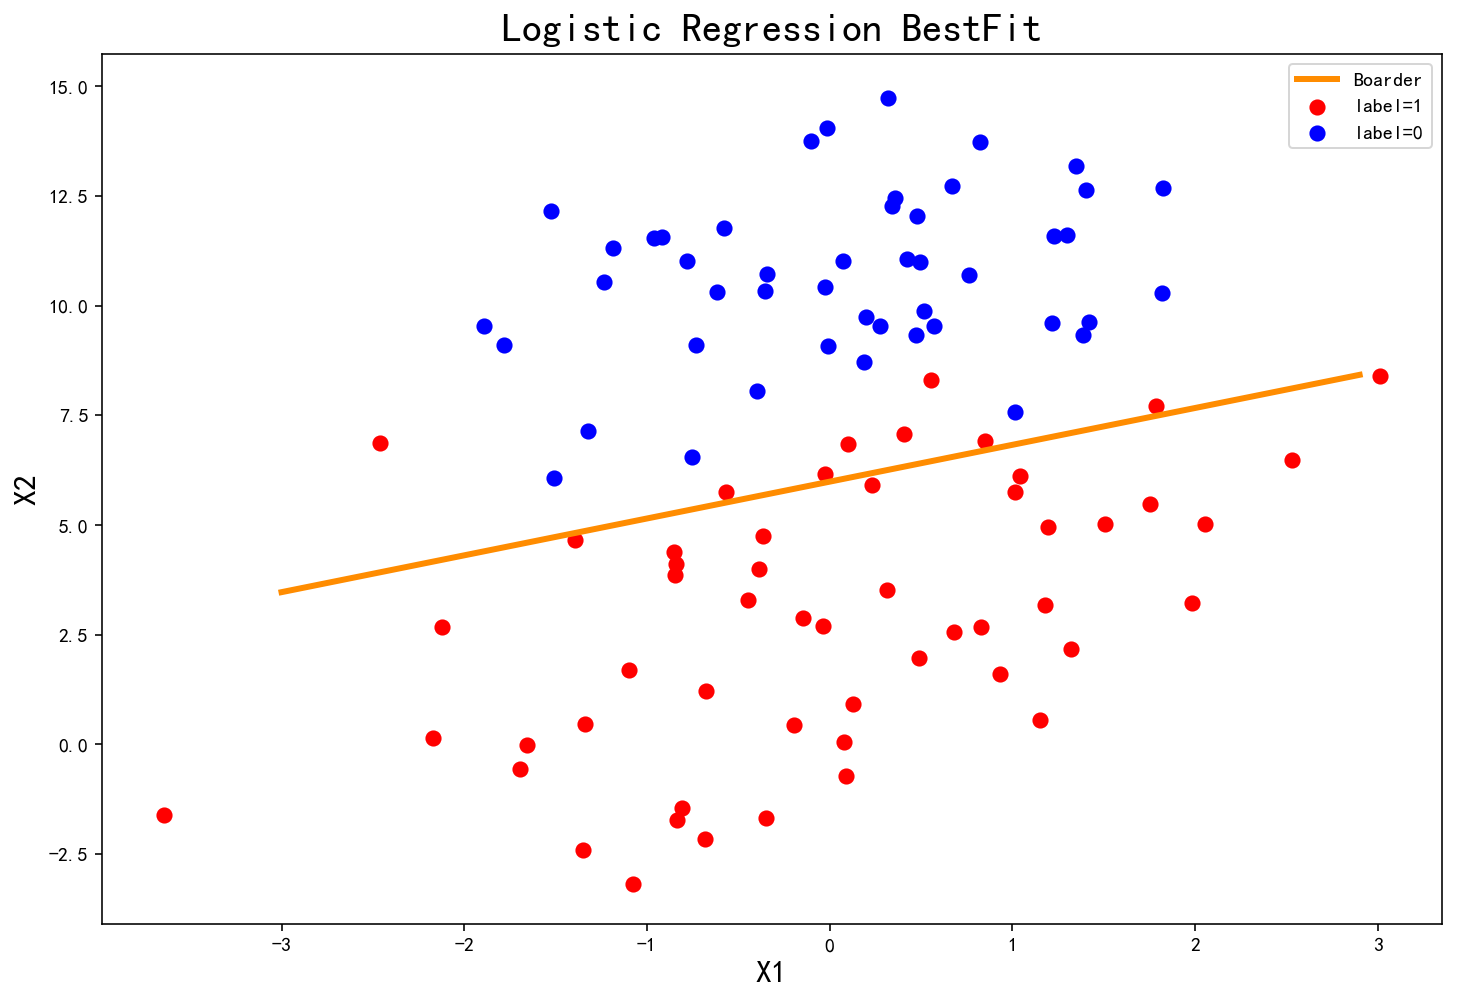

In [6]:
dataMat,labelMat=loadDataSet()
weights=gradAscent(dataMat,labelMat)
print ("迭代1000次后的逻辑斯蒂回归模型系数w=(w0,w1,w2)=({0},{1},{2})"\
       .format(round(float(weights[0]),2),round(float(weights[1]),2),round(float(weights[2]),2)))
print ("决策边界及分类如图所示")
plotBestFit(weights)

**小结**
- 至此绘制出由逻辑斯蒂回归模型得到的决策边界
- 以上计算可以看到，梯度上升法计算量较大，即使是简单数据集计算量也很大（100条3维度数据需要进行300次乘法，再算上1000此迭代，计算量就更大了），当面对上万上亿条数据，计算复杂度就太大了
- 下面给出梯度上升法的改进算法，降低计算量>>>随机梯度上升法

## 3. 改进算法
### 3.1 随机梯度上升法
   - 一次仅用一个样本点来更新回归系数w
   - 此方法可以在新样本到来时进行增量式的更新，因此随机梯度上升法是一种**在线学习算法**

In [22]:
"""
随机梯度上升法
思路：与梯度上升法类似，不同之处在于
1. 随机梯度上升法一次只用一个样本点来更新回归系数w
2. 需要遍历所有的样本点来更新回归系数w，然后才相当于梯度上升法的一次迭代
3. 相比于梯度上升法，随机梯度上升法每次迭代只有100次(样本数)乘法，复杂度大大降低，特别对于高维样本

注意：np.mat()矩阵、array数组计算是元素级的，而list计算是整体的，
比如矩阵乘法是对矩阵中各元素计算，而list乘法是直接倍乘list
"""
def stocGradAscent(dataMat,labelMat):
    m,n=np.shape(dataMat) #m个样本，n个维度(特征)，dataMat为list
    dataMatrix=np.mat(dataMat) #list转换为矩阵，便于后续计算
    alpha=0.01 #步子迈大点
    weights=np.ones((n,1)) #初始化回归系数，一维数组
    
    for i in range(m): #遍历所有样本点
        #第i个样本点的F(x)值,float内为第i个样本点的w*x
        Fxi=sigmoid(float((dataMatrix[i]*weights)))
        
        #第i个样本的真实值与预测值误差，用于回归系数调整
        error=float(labelMat[i])-Fxi
        
        #回归系数调整，只用第i个样本点更新回归系数w
        weights=weights+alpha*error*dataMatrix[i].transpose()
    return weights

[[ 1.01702007]
 [ 0.85914348]
 [-0.36579921]] 

迭代1次后的随机梯度上升法得到的决策边界:


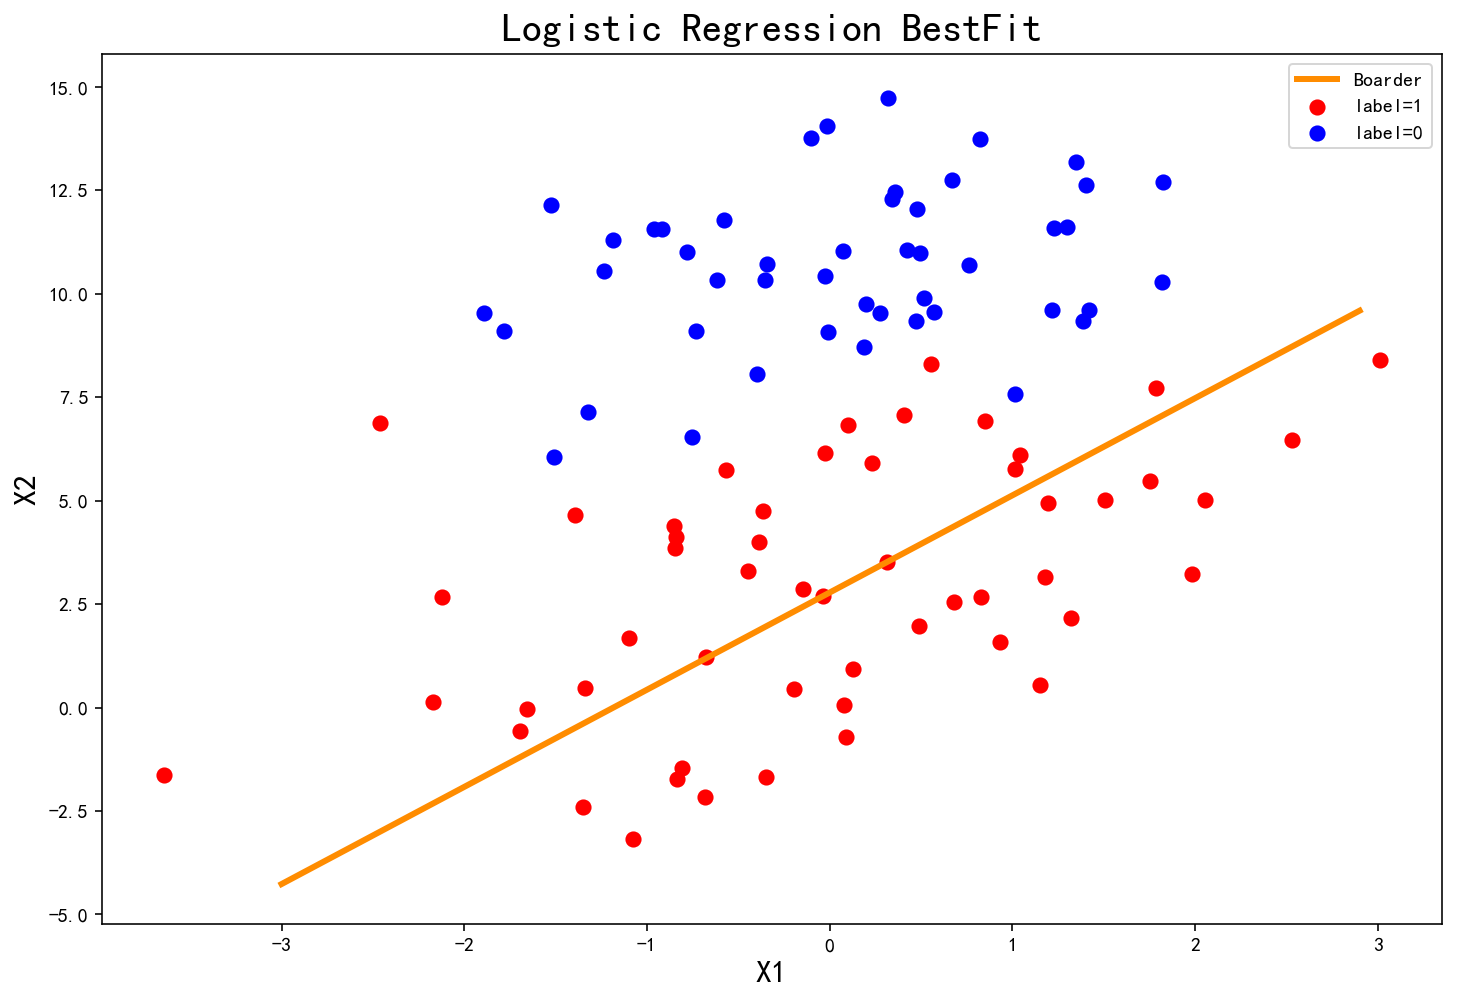

In [23]:
dataMat,labelMat=loadDataSet()
stocWeights=stocGradAscent(dataMat,labelMat)
print (stocWeights,"\n")
print ("迭代1次后的随机梯度上升法得到的决策边界:")
plotBestFit(stocWeights)

- 随机梯度上升法需要遍历所有的样本点来更新回归系数w，然后才相当于梯度上升法的一次迭代
- 上图是一次迭代的结果，实际使用时，需要多次迭代才能收敛

#### 判断优化算法的优劣：看它训练得到的参数是否收敛
   - 即，迭代n次后，参数w是否逐渐趋于稳定(类比IC设计中运放输出稳定不震荡的波形)
   - 后续会给出 “迭代次数-回归系数” 的波形图方便理解

### 3.2 改进的随机梯度上升法
**相比于上述的单迭代随机梯度上升法，改进项：**
   1. 加入了多次迭代
   2. 每次迭代的步长(alpha)会被调整,越往后迭代，步长越小 
     - **可缓解迭代过程中系数的波动，前几次迭代中，步长较大，即，alpha不是严格下降的，便于系数快速收敛**
   3. 每次迭代中，遍历样本不是按顺序遍历的，而是随机遍历的，即，随机选取样本来更新回归系数w，每次随机从样本集中选出一个样本，更新系数，然后删除该样本点，进行下一次i迭代
     - **可减少迭代过程中回归系数的周期性波动，因为周期性波动(波形图中的小锯齿)来自于一些不能被正确分类的样本点（数据集并非线性可分），这些样本点每次被用于更新系数时会引起系数的剧烈波动**

In [24]:
def stocGradAscentIter(dataMat,labelMat,numIter=150):
    m,n=np.shape(dataMat) #m个样本，n个维度(特征)，dataMat为list
    dataMatrix=np.mat(dataMat) #list转换为矩阵，便于后续计算
    weights=np.ones((n,1)) #初始化回归系数，一维数组

    for j in range(numIter):
        dataIndex=list(range(m))#样本点索引，用于存储尚未用于更新系数的样本点的索引
        for i in range(m): #遍历所有样本点
            """第j次迭代的第i个小迭代"""
            alpha=4/(1.0+j+i)+0.01 #每次迭代的步长(alpha)会被调整,越往后迭代，步长越小

            #随机选取样本点进行系数更新
            randIndex=np.random.randint(0,len(dataIndex)) #从尚未用于更新系数的样本点中随机选取一个样本
            Fxi=sigmoid(float((dataMatrix[randIndex]*weights)))
            error=float(labelMat[randIndex])-Fxi
            weights=weights+alpha*error*dataMatrix[randIndex].transpose()
            
            #删除已经用于更新系数的样本点的索引
            del(dataIndex[randIndex])
    return weights

**尝试只加入多次迭代，并不改进2、3项，看看后续的numIter-w波形图**

In [26]:
def stocGradAscentIter_noOpt(dataMat,labelMat,numIter=150):
    m,n=np.shape(dataMat) #m个样本，n个维度(特征)，dataMat为list
    dataMatrix=np.mat(dataMat) #list转换为矩阵，便于后续计算
    weights=np.ones((n,1)) #初始化回归系数，一维数组
    alpha=0.01
    
    for j in range(numIter):
        for i in range(m): #遍历所有样本点
            """第j次迭代的第i个小迭代"""            
            #随机选取样本点进行系数更新
            Fxi=sigmoid(float((dataMatrix[i]*weights)))
            error=float(labelMat[i])-Fxi
            weights=weights+alpha*error*dataMatrix[i].transpose()
    return weights

[[10.79510771]
 [ 1.11313101]
 [-1.72016919]] 

迭代10次后的随机梯度上升法得到的决策边界:


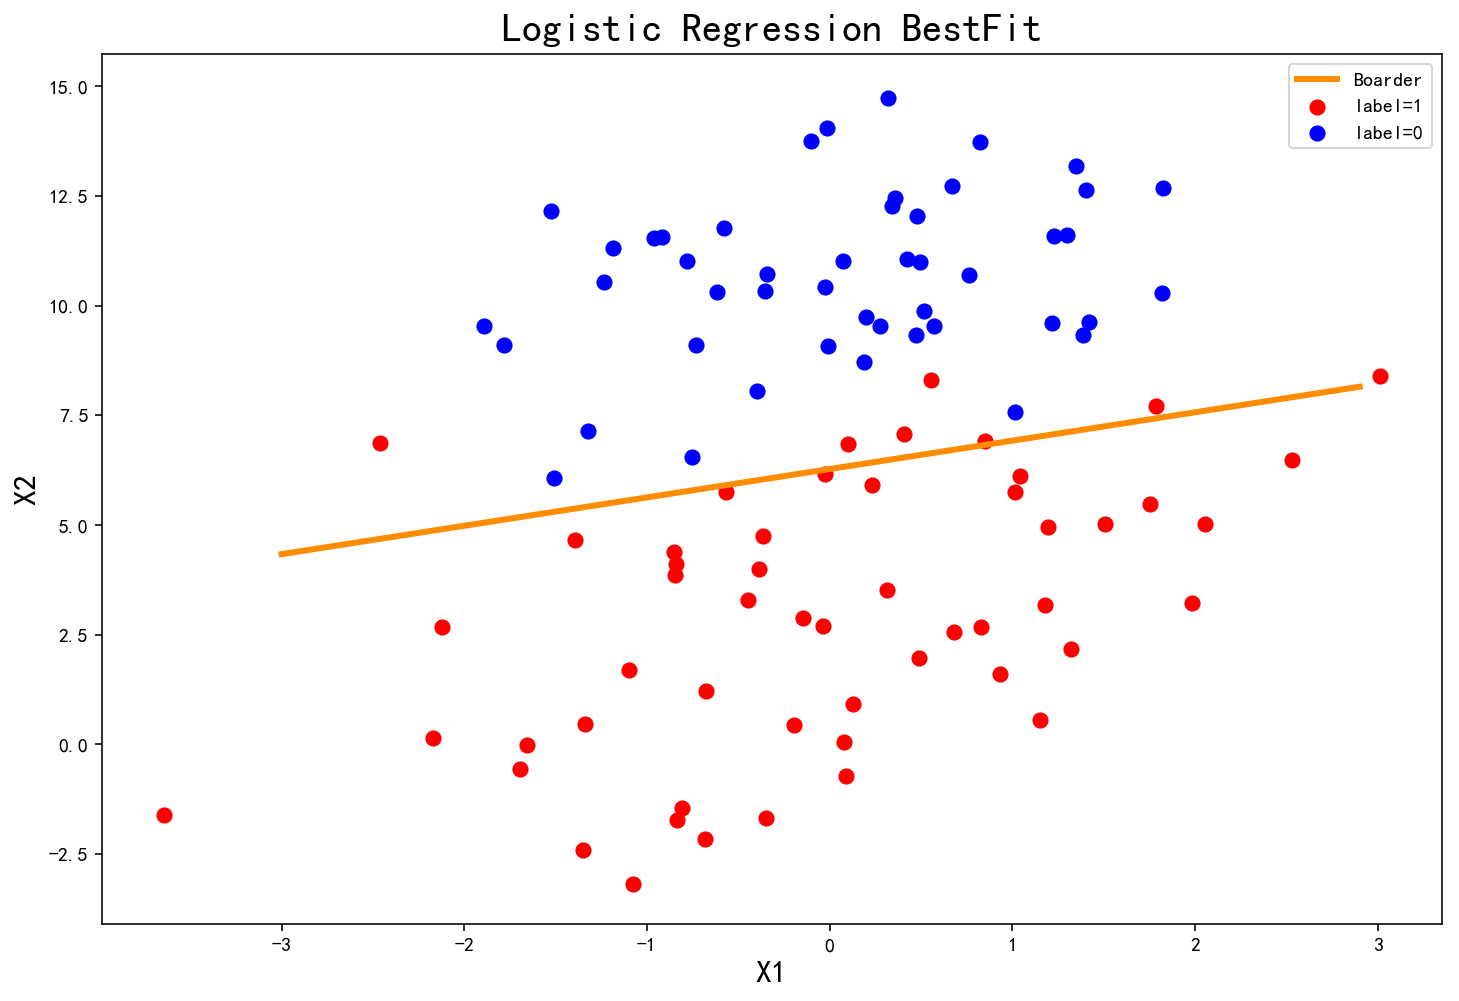

In [25]:
#测试改进的随机梯度上升算法(优化项1、2、3)
numIter=10
stocIterWeights=stocGradAscentIter(dataMat,labelMat,numIter)
print (stocIterWeights,"\n")
print ("迭代{0}次后的随机梯度上升法得到的决策边界:".format(numIter))
plotBestFit(stocIterWeights)

[[ 2.06626973]
 [ 0.3735852 ]
 [-0.4239816 ]] 

迭代10次后的随机梯度上升法得到的决策边界:


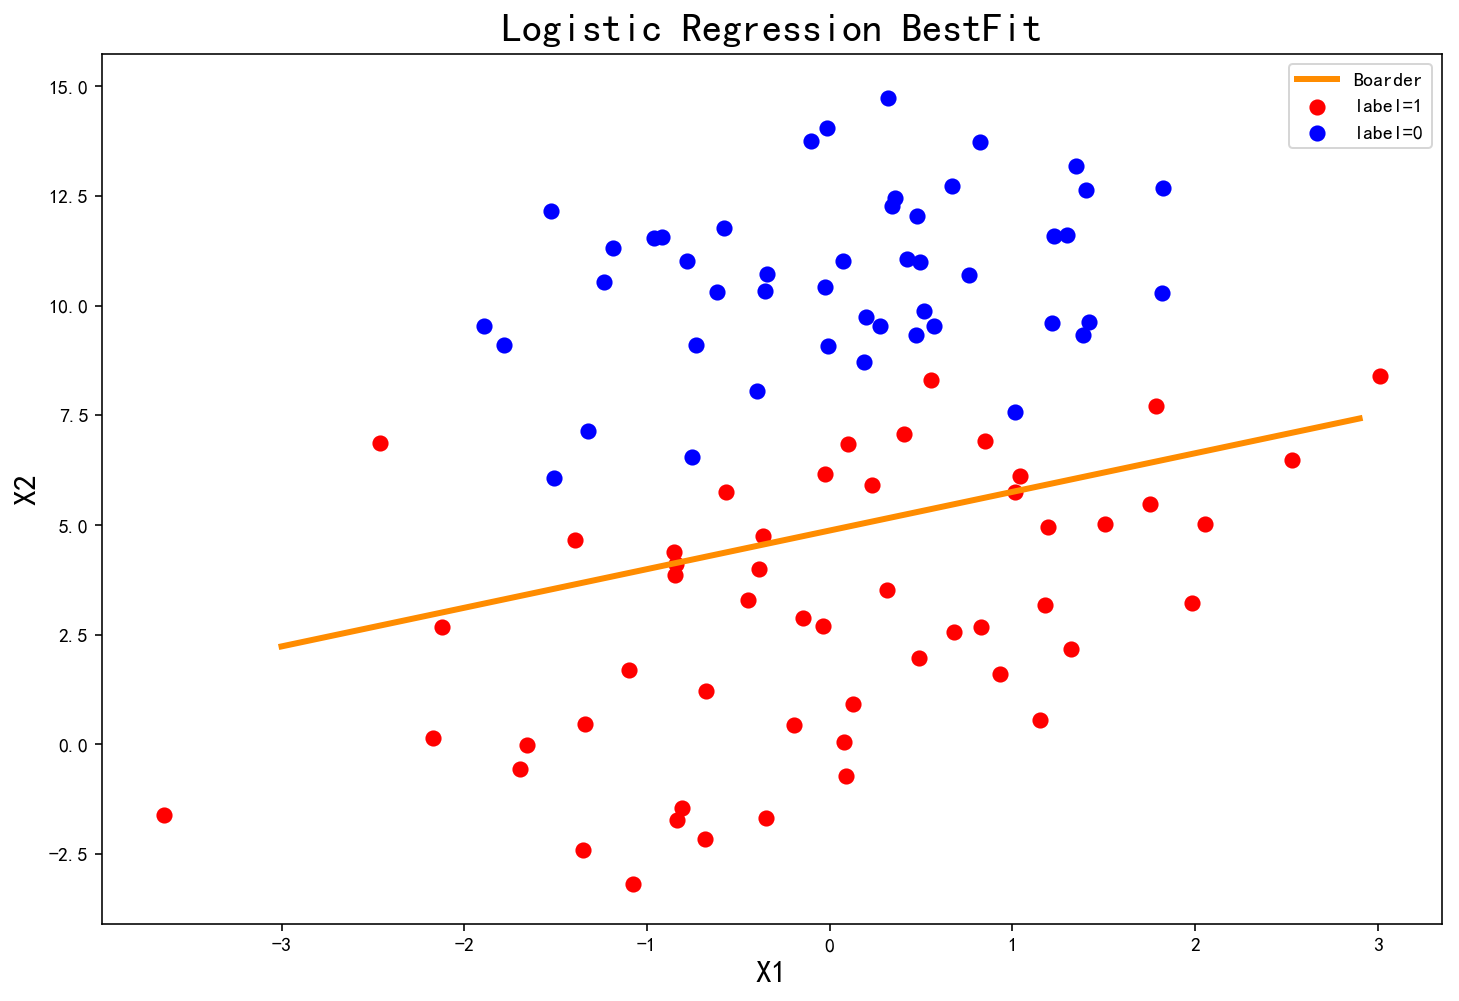

In [27]:
#测试小改进的随机梯度上升算法(优化项仅1)
stocIterWeights_noOpt=stocGradAscentIter_noOpt(dataMat,labelMat,numIter)
print (stocIterWeights_noOpt,"\n")
print ("迭代{0}次后的随机梯度上升法得到的决策边界:".format(numIter))
plotBestFit(stocIterWeights_noOpt)

- 可以看到，改进项1、2、3的随机梯度上升算法很快就收敛到接近最优值(10次迭代),而只有改进项1的随机梯度上升算法收敛较慢
- 这是因为改进项2在迭代前期加大了梯度步长，收敛更快
- 暂时看不出改进项3的优势，因为3是改进小锯齿，可以通过“迭代次数-回归系数”波形图的改善看到效果

### 3.3 绘制 “迭代次数-回归系数” 的波形图方便理解迭代过程

**改进项1、2、3的随机梯度上升算法**

In [47]:
#遍历迭代次数0~400，分别将不同迭代次数得到的回归系数存储到各列表中，便于绘图
dataMat,labelMat=loadDataSet()
x=[]
w0=[]
w1=[]
w2=[]
for i in np.arange(0,400,1):
    x.append(i)
    w0.append(stocGradAscentIter(dataMat,labelMat,i)[0])
    w1.append(stocGradAscentIter(dataMat,labelMat,i)[1])
    w2.append(stocGradAscentIter(dataMat,labelMat,i)[2])

E:\Users\AW\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


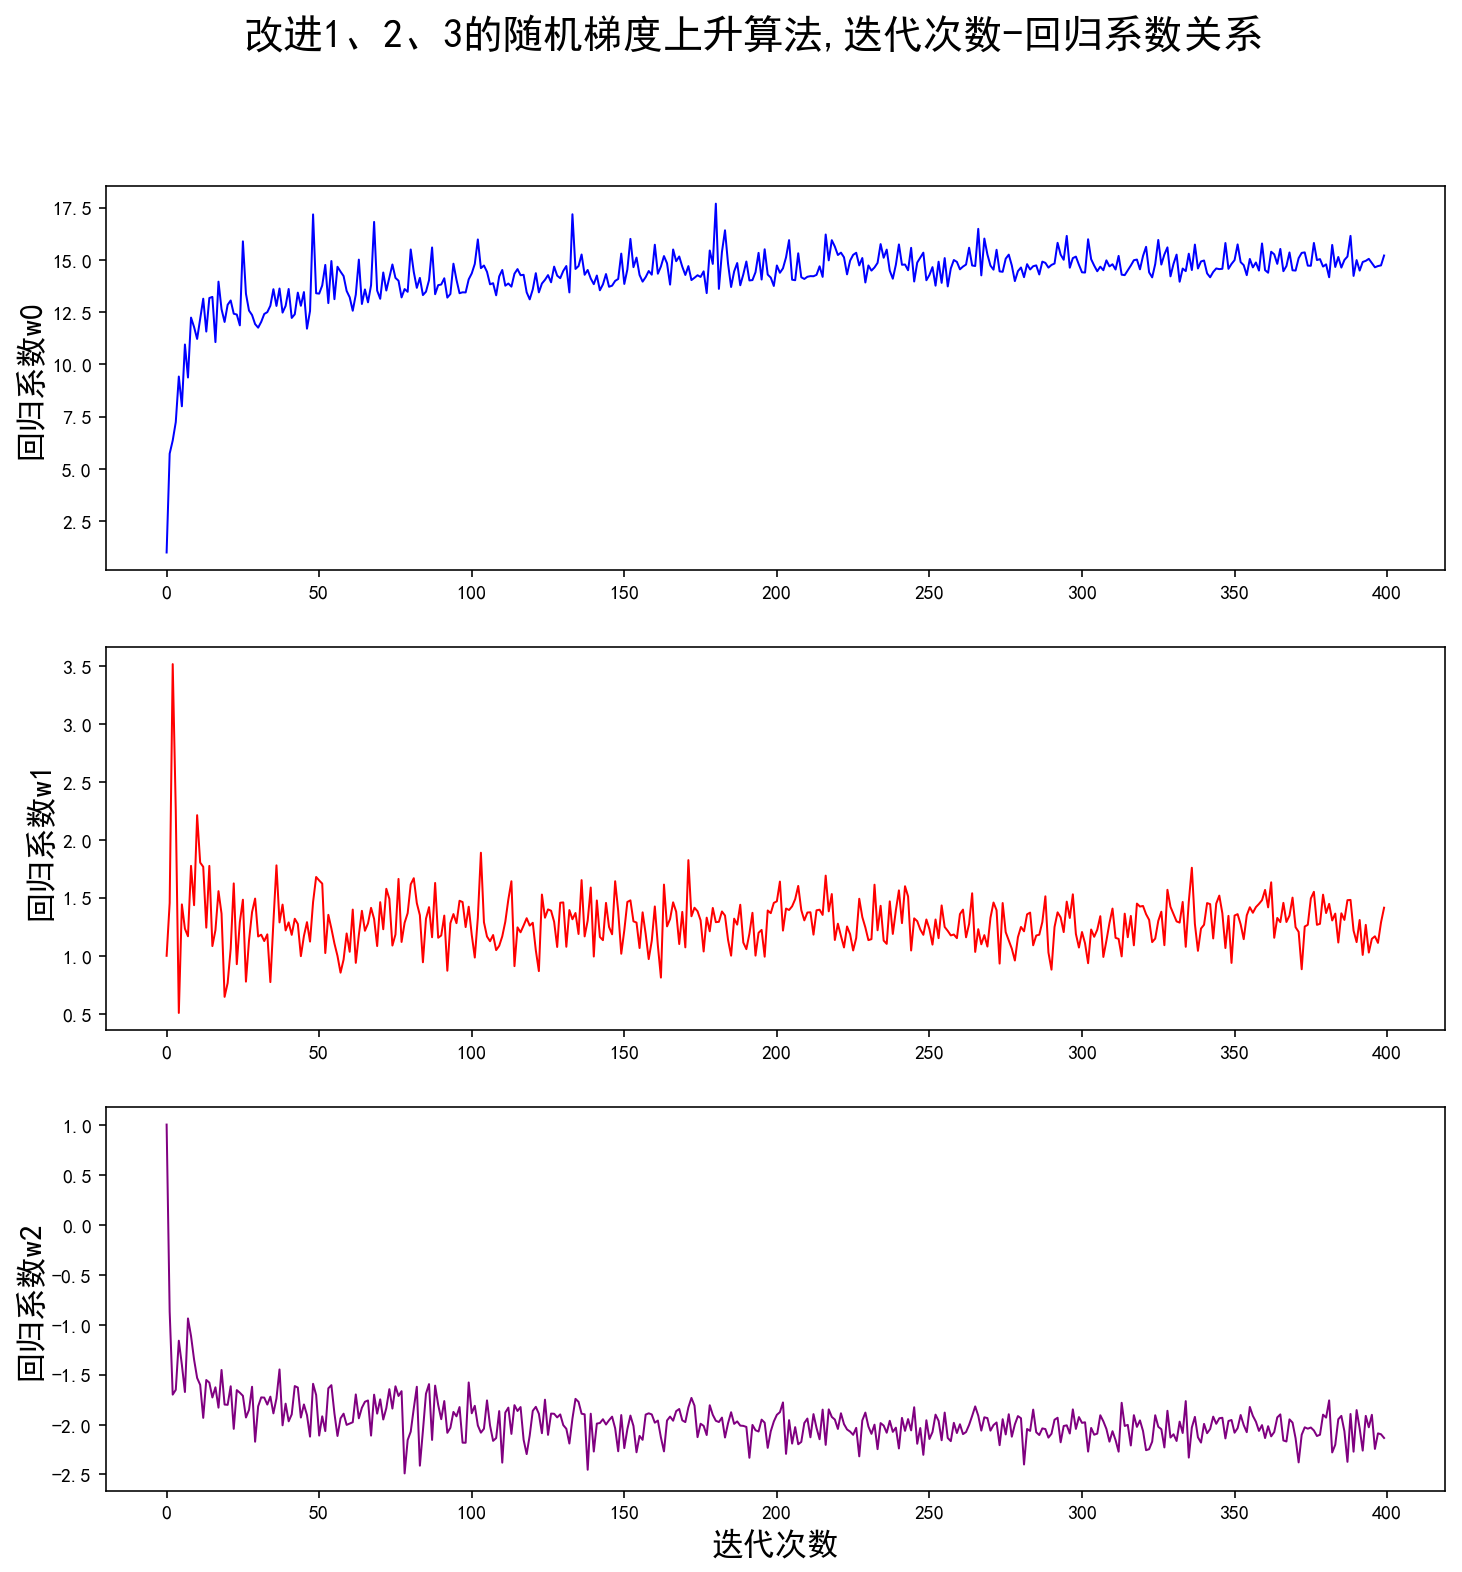

In [50]:
#绘图
fig=plt.figure(figsize=(12,12))
fig.suptitle("改进1、2、3的随机梯度上升算法,迭代次数-回归系数关系",fontsize=20,fontweight="bold")

ax1=fig.add_subplot(311)
plt.plot(x,w0,color="blue",linewidth=1.0)
plt.ylabel("回归系数w0",fontsize=16)

ax2=fig.add_subplot(312)
plt.plot(x,w1,color="red",linewidth=1.0)
plt.ylabel("回归系数w1",fontsize=16)

ax3=fig.add_subplot(313)
plt.plot(x,w2,color="purple",linewidth=1.0)
plt.xlabel("迭代次数",fontsize=16)
plt.ylabel("回归系数w2",fontsize=16)

plt.show()

**仅改进项1的随机梯度上升算法**

In [42]:
#遍历迭代次数0~200，分别将不同迭代次数得到的回归系数存储到各列表中，便于绘图
dataMat,labelMat=loadDataSet()
xx=[]
ww0=[]
ww1=[]
ww2=[]
for i in np.arange(0,200,1):
    xx.append(i)
    ww0.append(stocGradAscentIter_noOpt(dataMat,labelMat,i)[0])
    ww1.append(stocGradAscentIter_noOpt(dataMat,labelMat,i)[1])
    ww2.append(stocGradAscentIter_noOpt(dataMat,labelMat,i)[2])

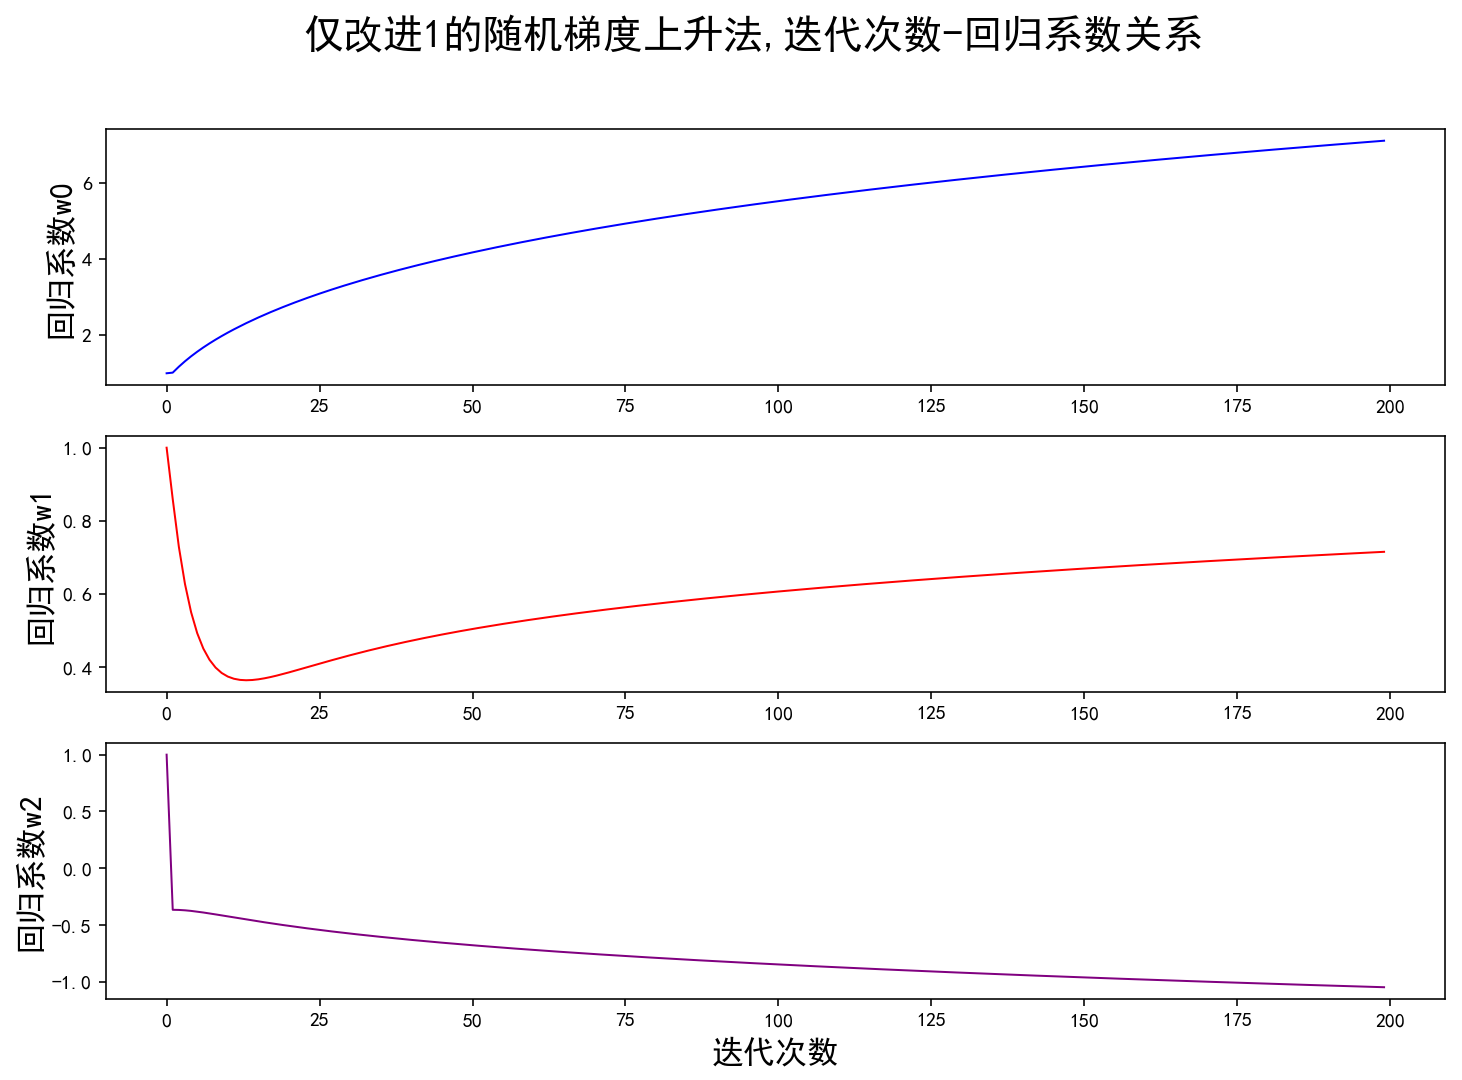

In [49]:
#绘图
fig=plt.figure(figsize=(12,8))
fig.suptitle("仅改进1的随机梯度上升法,迭代次数-回归系数关系",fontsize=20,fontweight="bold")

ax1=fig.add_subplot(311)
plt.plot(xx,ww0,color="blue",linewidth=1.0)
plt.ylabel("回归系数w0",fontsize=16)

ax2=fig.add_subplot(312)
plt.plot(xx,ww1,color="red",linewidth=1.0)
plt.ylabel("回归系数w1",fontsize=16)

ax3=fig.add_subplot(313)
plt.plot(xx,ww2,color="purple",linewidth=1.0)
plt.xlabel("迭代次数",fontsize=16)
plt.ylabel("回归系数w2",fontsize=16)

plt.show()

## 4. 练习：病马数据集
- 收集数据：http://archive.ics.uci.edu/ml/datasets/Horse+Colic
- 准备数据：无类别数据整行删除、空特征值填0、类别数据归为两类便于二分类
- 分析数据：注意，原始数据集的特征不全，缺失达30%，对缺失数据填0，虽不影响梯度上升算法中对参数的调整，但较多缺失数据对于模型分类准确率有很大影响
- 训练模型：logistic回归模型参数weight训练
- 测试模型：logistic回归模型在测试集上的错误率，根据错误率决定是否回退到训练阶段，调整迭代次数、步长来改善模型
- 使用模型：使用训练好的模型来预测病马是否会死亡

### 收集/处理数据
- 较为简单且数据量小，直接在excel中完成
- 处理完毕如下，空值填0、类别仅有0、1

In [42]:
cols=["surgery","age","hospital_number","rectal_temperature","pulse","respiratory_rate",\
     "temperature_of_extremities","peripheral_pulse","mucous_membranes","capillary_refill time",\
     "pain","peristalsis","abdominal_distension","nasogastric_tube","nasogastric_reflux",\
     "nasogastric_reflux_PH","rectal_examination","abdomen","packed_cell_volume","total_protein",\
     "abdominocentesis_appearance","abdomcentesis_total_protein","surgical_lesion",\
     "type_of_lesion1","type_of_lesion2","type_of_lesion3","cp_data","outcome"]
horseTrain=pd.read_csv(r"D:\DM\python\data\horseColicTrain.txt",sep="\t",names=cols)
horseTest=pd.read_csv(r"D:\DM\python\data\horseColicTest.txt",sep="\t",names=cols)
horseTrain.head()

,surgery,age,hospital_number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill time,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,surgical_lesion,type_of_lesion1,type_of_lesion2,type_of_lesion3,cp_data,outcome
0,2,1,530101,38.5,66,28,3,3,0,2,...,45.0,8.4,0,0.0,2,11300,0,0,2,1
1,1,1,534817,39.2,88,20,0,0,4,1,...,50.0,85.0,2,2.0,2,2208,0,0,2,1
2,2,1,530334,38.3,40,24,1,1,3,1,...,33.0,6.7,0,0.0,2,0,0,0,1,0
3,1,9,5290409,39.1,164,84,4,1,6,2,...,48.0,7.2,3,5.3,1,2208,0,0,1,1
4,2,1,530255,37.3,104,35,0,0,6,2,...,74.0,7.4,0,0.0,2,4300,0,0,2,1


In [43]:
horseTrain.shape

(299, 28)

In [44]:
horseTrain.describe()

,surgery,age,hospital_number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill time,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,surgical_lesion,type_of_lesion1,type_of_lesion2,type_of_lesion3,cp_data,outcome
count,299.000000,299.00000,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,1.397993,1.64214,1.087733e+06,30.509365,66.220736,24.551839,1.906355,1.555184,2.404682,1.167224,...,41.816054,21.595318,0.913043,1.026756,1.364548,3659.709030,90.528428,7.387960,1.668896,0.404682
std,0.490305,2.17730,1.532032e+06,15.326224,33.741787,19.922496,1.315088,1.250288,1.817175,0.606560,...,16.934178,26.905928,1.149466,1.836639,0.482110,5408.472421,650.637139,127.749768,0.471399,0.491653
min,1.000000,1.00000,5.184760e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.00000,5.289040e+05,37.200000,48.000000,12.000000,1.000000,1.000000,1.000000,1.000000,...,37.000000,6.200000,0.000000,0.000000,1.000000,2111.500000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.00000,5.303010e+05,38.000000,60.000000,22.000000,2.000000,1.000000,2.000000,1.000000,...,44.000000,7.200000,0.000000,0.000000,1.000000,2322.000000,0.000000,0.000000,2.000000,0.000000
75%,2.000000,1.00000,5.347360e+05,38.500000,88.000000,34.500000,3.000000,3.000000,4.000000,2.000000,...,50.000000,52.000000,2.000000,2.000000,2.000000,3209.000000,0.000000,0.000000,2.000000,1.000000
max,2.000000,9.00000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,...,75.000000,89.000000,3.000000,10.100000,2.000000,41110.000000,7111.000000,2209.000000,2.000000,1.000000


### 分析数据
- 病马数据共368条，27个特征，1个类别标签（outcome）
- 其中300条为训练集类别非空299条，68条为测试集类别非空67条
- 27个特征均为数值类型，已经将其中的空值填充为0（对于logistic回归，0不会对梯度上升法更新系数产生影响，因为 0特征值×error=0，相当于不影响下一次迭代的系数）
- 类别标签outcome共三个值，1代表存活，2代表死亡，3代表已安乐死，将2、3归为同一类死亡，即，0-存活、1-死亡
- 目前：无缺失数据、类别为二分类、训练集299条、测试集67条，均为数值类型。下一步将利用训练集来训练logistic回归模型的系数，然后用测试集测试模型的准确率，帮助调整训练参数(步长、迭代次数等)，最终确定模型，最后用一组病马数据测试一下最终模型的准确性
- **思考：数据维度较多，考虑选取强相关系数进行降维**

In [45]:
#相关性分析，数据降维。选取相关系数绝对值>0.11的特征作为训练特征
corr=horseTrain.corr()[(horseTrain.corr().outcome)**2>0.012][["outcome"]]
corr

,outcome
surgery,-0.169236
rectal_temperature,-0.166705
pulse,0.254732
temperature_of_extremities,0.219700
peripheral_pulse,0.261065
mucous_membranes,0.334411
capillary_refill time,0.233669
pain,0.269894
peristalsis,0.138660
abdominal_distension,0.227796


In [61]:
#提取相关特征，作为训练集、测试集样本点的特征
horseTrainFeat=horseTrain[["surgery","rectal_temperature","pulse","temperature_of_extremities",\
                          "peripheral_pulse","mucous_membranes","capillary_refill time","pain",\
                          "peristalsis","abdominal_distension","nasogastric_reflux",\
                          "nasogastric_reflux_PH","abdomen","packed_cell_volume","total_protein",\
                          "abdominocentesis_appearance","abdomcentesis_total_protein","surgical_lesion"]]
horseTestFeat=horseTest[["surgery","rectal_temperature","pulse","temperature_of_extremities",\
                          "peripheral_pulse","mucous_membranes","capillary_refill time","pain",\
                          "peristalsis","abdominal_distension","nasogastric_reflux",\
                          "nasogastric_reflux_PH","abdomen","packed_cell_volume","total_protein",\
                          "abdominocentesis_appearance","abdomcentesis_total_protein","surgical_lesion"]]
horseTrainFeat.head()

,surgery,rectal_temperature,pulse,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill time,pain,peristalsis,abdominal_distension,nasogastric_reflux,nasogastric_reflux_PH,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,surgical_lesion
0,2,38.5,66,3,3,0,2,5,4,4,0,0.0,5,45.0,8.4,0,0.0,2
1,1,39.2,88,0,0,4,1,3,4,2,0,0.0,2,50.0,85.0,2,2.0,2
2,2,38.3,40,1,1,3,1,3,3,1,0,0.0,1,33.0,6.7,0,0.0,2
3,1,39.1,164,4,1,6,2,2,4,4,2,5.0,0,48.0,7.2,3,5.3,1
4,2,37.3,104,0,0,6,2,0,0,0,0,0.0,0,74.0,7.4,0,0.0,2


### 训练/测试模型
- 用改进的随机梯度上升算法stocGradAscentIter(dataMat,labelMat,numIter=150)，结合训练集的特征和标签训练模型参数
- 用测试集样本点的实际分类标签和回归模型预测的分类标签对比，计算模型分类错误率(分错的样本点/总样本点)

**模型测试函数**

In [37]:
#sigmoid函数(类阶跃函数，只是0>1斜率较缓，不是瞬变的)
def sigmoid(z):
    return 1.0/(1+np.exp(-z)) # z=w*x


#分类函数，将w*x输入sigmoid函数，结果>0.5则分类到1(死亡)，否则分类到0(存活)
"""样本分类0(存活)、1(死亡)，在训练模型参数时，存活马和死亡马的特征x*模型参数w，
sigmoid(w*x)的值会随着梯度上升算法慢慢靠近样本真实分类0、1值，
此时的参数w能够将两种马较好地分类。
于是在测试模型时，测试样本点特征x输入到sigmoid(w*x)中，w为训练好的模型参数，
测试样本点的sigmoid(w*x)值也会靠近其真实值0、1，
于是我们将sigmoid(w*x)>0.5的置为1，将sigmoid(w*x)<=0.5的置为0
"""
def classifyVec(z):
    prob=sigmoid(z)
    if prob>0.5:
        return 1.0
    else:
        return 0.0

In [66]:
#改进的随机梯度上升算法
def stocGradAscentIter(dataMat,labelMat,numIter=150):
    m,n=np.shape(dataMat) #m个样本，n个维度(特征)，dataMat为list
    dataMatrix=np.mat(dataMat) #list转换为矩阵，便于后续计算
    weights=np.ones((n,1)) #初始化回归系数，一维数组

    for j in range(numIter):
        dataIndex=list(range(m))#样本点索引，用于存储尚未用于更新系数的样本点的索引
        for i in range(m): #遍历所有样本点
            """第j次迭代的第i个小迭代"""
            alpha=4/(1.0+j+i)+0.01 #每次迭代的步长(alpha)会被调整,越往后迭代，步长越小

            #随机选取样本点进行系数更新
            randIndex=np.random.randint(0,len(dataIndex)) #从尚未用于更新系数的样本点中随机选取一个样本
            Fxi=sigmoid(float((dataMatrix[randIndex]*weights)))
            error=float(labelMat[randIndex])-Fxi
            weights=weights+alpha*error*dataMatrix[randIndex].transpose()
            
            #删除已经用于更新系数的样本点的索引
            del(dataIndex[randIndex])
    return weights

In [76]:
#测试模型对测试集样本点分类的错误率，以便调整训练参数，优化模型参数w
def modelErrorTest(train_dataMat,train_labelMat,test_dataMat,test_labelMat,numIter):
    #调用改进的随机梯度上升算法训练模型参数
    trainWeights=stocGradAscentIter(train_dataMat,train_labelMat,numIter)
    
    #利用训练得到的模型参数，预测训练集样本点分类的错误率
    errorCount=0;testCount=0 #前者计数错误次数，后者计数样本点数
    for i in range(test_dataMat.shape[0]):
        testCount+=1
        predictLabel=classifyVec(test_dataMat[i]*trainWeights) #第i个样本的预测分类
        
        #若第i个样本的预测分类与其真实分类不同，则error计数加1
        if int(predictLabel)!=int(test_labelMat[i]):
            errorCount+=1
    
    errorRate=float(errorCount/testCount)
    print ("logistic回归模型分类错误率为{0}%".format(errorRate*100))
    return errorRate

#多次调用模型测试函数，计算每次测试错误率的均值
#因为是随机梯度上升算法，若数据分布不均匀，则每次训练得到的模型错误率会有差别
#因此取多次训练错误率的均值来评估一个模型的优劣
def multiTest(train_dataMat,train_labelMat,test_dataMat,test_labelMat,numIter,numTest):
    errorSum=0.0
    for k in range(numTest):
        errorSum+=modelErrorTest(train_dataMat,train_labelMat,test_dataMat,test_labelMat,numIter)
    avgError=errorSum/float(numTest)
    print ("{0}次训练后(每次训练迭代{2}次)，logistic回归模型预测错误率为{1}%"\
           .format(numTest,avgError*100,numIter))
    return avgError

**数据带入进行训练和测试**
- 利用相关系数筛选后的特征矩阵进行训练（horseTrainFeat，horseTestFeat）
- 利用未筛选的特征矩阵进行训练（horseTrain，horseTest）

In [62]:
#利用相关系数筛选后的特征矩阵进行训练（horseTrainFeat，horseTestFeat）
#建立训练集特征和标签矩阵
train_dataMat=np.mat(horseTrainFeat)
train_labelMat=np.mat(horseTrain[["outcome"]])
train_dataMat.shape

(299, 18)

In [63]:
#建立测试集特征和标签矩阵
test_dataMat=np.mat(horseTestFeat)
test_labelMat=np.mat(horseTest[["outcome"]])
test_dataMat.shape

(67, 18)

In [64]:
train_dataMat

matrix([[  2. ,  38.5,  66. , ...,   0. ,   0. ,   2. ],
        [  1. ,  39.2,  88. , ...,   2. ,   2. ,   2. ],
        [  2. ,  38.3,  40. , ...,   0. ,   0. ,   2. ],
        ...,
        [  1. ,  37.5,  72. , ...,   0. ,   0. ,   1. ],
        [  1. ,  36.5, 100. , ...,   3. ,   3.4,   1. ],
        [  1. ,  37.2,  40. , ...,   1. ,   1. ,   2. ]])

In [73]:
#利用未筛选的特征矩阵进行训练（horseTrain，horseTest）
#建立训练集特征和标签矩阵
horseTrainFeat2=horseTrain.drop("outcome",axis=1,inplace=False)
train_dataMat2=np.mat(horseTrainFeat2)
train_labelMat2=np.mat(horseTrain[["outcome"]])
train_dataMat2.shape

(299, 27)

In [74]:
#建立测试集特征和标签矩阵
horseTestFeat2=horseTest.drop("outcome",axis=1,inplace=False)
test_dataMat2=np.mat(horseTestFeat2)
test_labelMat2=np.mat(horseTest[["outcome"]])
test_dataMat2.shape

(67, 27)

In [79]:
test_labelMat2.shape

(67, 1)

In [80]:
#利用相关系数筛选后的特征矩阵进行训练（horseTrainFeat，horseTestFeat）
multiTest(train_dataMat,train_labelMat,test_dataMat,test_labelMat,500,10)

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


logistic回归模型分类错误率为37.3134328358209%
logistic回归模型分类错误率为29.850746268656714%
logistic回归模型分类错误率为56.71641791044776%
logistic回归模型分类错误率为59.70149253731343%
logistic回归模型分类错误率为47.76119402985074%
logistic回归模型分类错误率为58.2089552238806%
logistic回归模型分类错误率为37.3134328358209%
logistic回归模型分类错误率为43.28358208955223%
logistic回归模型分类错误率为40.298507462686565%
logistic回归模型分类错误率为29.850746268656714%
10次训练后(每次训练迭代500次)，logistic回归模型预测错误率为44.02985074626866%


0.44029850746268656

In [77]:
#利用未筛选的特征矩阵进行训练（horseTrain，horseTest）
multiTest(train_dataMat2,train_labelMat2,test_dataMat2,test_labelMat2,500,10)

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


logistic回归模型分类错误率为70.1492537313433%
logistic回归模型分类错误率为70.1492537313433%
logistic回归模型分类错误率为70.1492537313433%
logistic回归模型分类错误率为70.1492537313433%
logistic回归模型分类错误率为70.1492537313433%
logistic回归模型分类错误率为70.1492537313433%
logistic回归模型分类错误率为68.65671641791045%
logistic回归模型分类错误率为70.1492537313433%
logistic回归模型分类错误率为70.1492537313433%
logistic回归模型分类错误率为70.1492537313433%
10次训练后(每次训练迭代500次)，logistic回归模型预测错误率为70.0%


0.7

**对比以上训练结果**
- **关于数据质量**
    - 由于原始数据集的特征不全，缺失达30%,对缺失数据填0，虽不影响梯度上升算法中对参数的调整，但较多缺失数据对于模型分类准确率有很大影响
    - 可以通过改变迭代次数numIter、改变梯度步长alpha等参数来优化模型训练的到的参数weight，但原始数据缺失对于模型准确率的影响还是很大的
- **关于筛选特征**
    - 利用相关系数筛选后的特征矩阵进行训练，得到的模型准确率更高，高出未筛选仅26%
    - 数据维度太多并不是好事，应该排除相关性较小的维度进行训练，避免维度灾难

- **关于算法调优**
    1. 步长alpha的选择：步长太大，会导致迭代过快，甚至有可能错过最优解。步长太小，迭代速度太慢，很长时间算法都不能结束
    2. 迭代次数numIter的选择：迭代次数太少，模型参数尚未收敛稳定，迭代次数太多，浪费计算资源
    3. 参数weight初始值的选择：对于非凸函数，初始值的选择对于最优化结果影响很大(会得到不同的局部最优值)。**由于有局部最优解的风险，需要多次用不同初始值运行算法，选择损失函数最小化的初值**
    4. 特征值标准化：由于样本不同特征的取值范围不一样，可能导致迭代很慢，为了减少特征取值的影响，可以对特征数据标准化(如z-score,max-min)
        - max-min归一化,所有值减去min然后除以(max-min), preprocessing.MinMaxScaler
        - z-score标准化,(x-avg(x))/std(x), preprocessing.StandardScaler

### 使用模型
- 上述测试发现，筛选特征后的数据训练的模型性能更好（虽然错误率较高，但这主要是由于数据缺失值较多引起的）
- 因此我们使用筛选特征后的数据训练的模型
- 使用方法很简单：
    - 使用随机梯度上升算法，结合筛选后的训练集样本点特征x，训练模型参数w
    - 利用分类函数classifyVec(z)，z=wx，x为待分类样本的特征，得到该样本点的分类

In [84]:
# 使用随机梯度上升算法，结合筛选后的训练集样本点特征x，训练模型参数w
trainWeights=stocGradAscentIter(train_dataMat,train_labelMat,500)

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [94]:
# 从测试集任意选取一个样本点作为测试样本
i=np.random.randint(0,67)
test_x=test_dataMat[i]
predict_test=classifyVec(test_x*trainWeights)
print ("预测样本点为{0}类，样本点实际为{1}类".format(int(predict_test),int(test_labelMat[i])))

预测样本点为0类，样本点实际为0类
